# Warm-up excercises week 5

Now that you have seen how to conduct basic analyses and to visualise data, it's time for you to combine apply this knowledge. To prepare for the tutorial, we ask you to complete two warm-up excercises.


Some important notes for the excercises:

* These excercises are a warming up meant to help you get ready for class. Make sure to give them a try on all of them. If you get an error message, try to troubleshoot it (using Google often helps). If all else fails, go to the next excercise (but make sure to hand it in).
* While we of course like when you get all the answers right, the important thing is to exercise and apply the knowledge. So we will still accept solutions that may not be complete, as long as we see enough effort for each excercise. 
* Delivering the warm-up excercises on time is critical, as it helps also prepare for the tutorial session.
* As these excercises are meant to help you participate in the tutorial and us to make sure you can get as much as possible from the tutorials, we do not expect perfect answers. However, this is important to show the effort you have put in the excercises and what obstacles you faced.

For this week warm-up excercices, we will use the dataset about customers of a company that you also worked with last week. There are two short excercises for you to practice data exploration and visualization.

Let's start by importing the necessary packages and loading the data. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

# Excercise 1

1. Explore the demographics of the customer base by answering the follolwing questions:
    - What is the minimum, maximum and average age of the customers in the dataset? <br /> *Tip: you need to create a new column based on `Year_Birth`. <br /> Reminder: Pandas makes it easy to run numerical operations across columns. Let's say that I want to multiply the value that is in column A by the value that is in column B and store it in column C... I can simply use: `df['C'] = df['A'] * df['B']`*
    - What are the relative and absolute frequencies of education levels of customers in the dataset? <br /> *Tip: the same method of pandas allows you to compute relative and absolute frequencies for a column.*
2. You want to know what type of customers file complains. Get an initial idea of the relationship between 1) education level, 2) age, and if someone has complaint in the last two years. <br />*Tip: use `.crosstab` or `group_by` to get an idea about the relation between two variables.*
3. Is there a correlation between one's income and number of purchases they make online and in store?

In [7]:
#creating the age variable
df['Age'] = 2022 - df['Year_Birth']

In [5]:
#descriptive statostics for age
df['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

The youngest person in the dataset is 26 years old, the oldest: 129 years old (probably a mistake) and the average age is 53.

In [6]:
df.columns

Index(['customer_id', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age'],
      dtype='object')

In [5]:
#Absolute frequencies
df['Education'].value_counts()

Graduation    1126
PhD            486
Master         370
2n Cycle       202
Basic           54
Name: Education, dtype: int64

In [8]:
#Relative frequencies
df['Education'].value_counts(normalize=True)

Graduation    0.503128
PhD           0.217158
Master        0.165326
2n Cycle      0.090259
Basic         0.024129
Name: Education, dtype: float64

In [16]:
#crosstabs between education and number of complains
pd.crosstab(df['Education'], df['Complain'])

Complain,0,1
Education,,
2n Cycle,198,4
Basic,54,0
Graduation,1112,14
Master,368,2
PhD,485,1


We see that in general there are a few complains and that customers with all levels of education file them except basic (but we have to note that there are few people with basic education in the data).

In [17]:
#Grouping by complain (categorical variable) and getting mean age per group
df.groupby('Complain')['Age'].mean()

Complain
0    53.159081
1    56.904762
Name: Age, dtype: float64

There is a slight difference in age between people filing and not filing a complain - the ones who have filed a complain are on average older (but we do not know if this difference is significant).

# Excercise 2

Visualize different variables in your dataset. Make sure to consider what the appropriate visualization is for each variable.
1. Visualize age distribution of the customers.
2. Visualize education levels of the customers.
3. Visualize the relation between
    * education level and if someone has complaint in the last two years,
    * age and if someone has complaint in the last two years. 
4. Visualize the relation between one's income and number of purchases they have made online and in store. 

<AxesSubplot:ylabel='Frequency'>

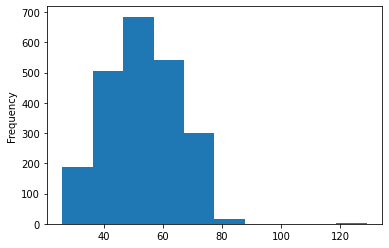

In [8]:
#Histogram for age with matplotlib
df['Age'].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

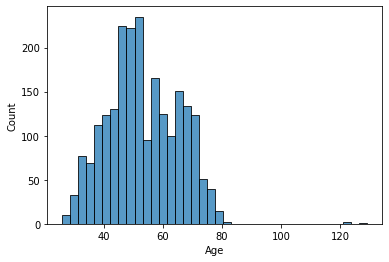

In [10]:
#Histogram with seaborn
sns.histplot(data=df, x='Age')

<AxesSubplot:>

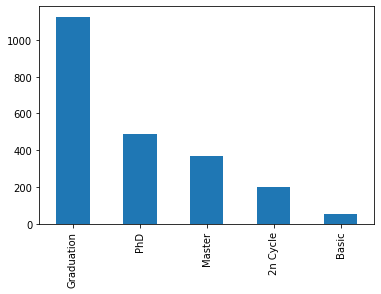

In [9]:
#Bar chart for education levels
df['Education'].value_counts().plot.bar()

<AxesSubplot:xlabel='Education', ylabel='count'>

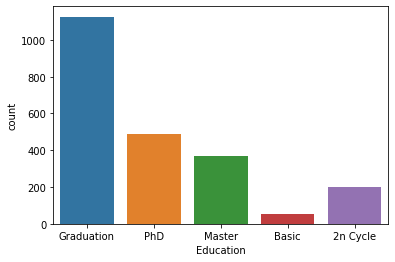

In [11]:
#bar chart with seaborn
sns.countplot(x = 'Education', data=df)

<AxesSubplot:xlabel='Education', ylabel='Complain'>

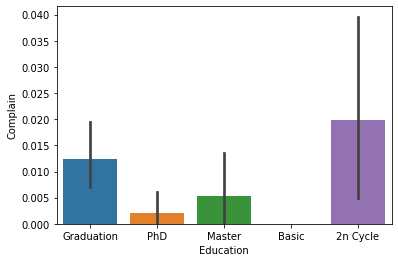

In [12]:
#Bar chart for categorical IV (education) and binary DV (complain)
sns.barplot(x="Education", y="Complain", data=df, ci=95)

<AxesSubplot:xlabel='Education', ylabel='Age'>

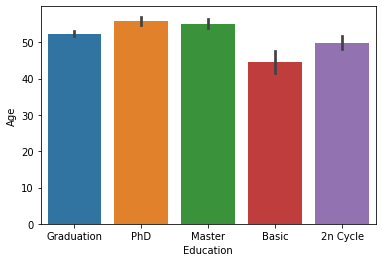

In [13]:
#Bar chart for categorical IV (education) and continous DV (Age)
sns.barplot(x="Education", y="Age", data=df, ci=95)

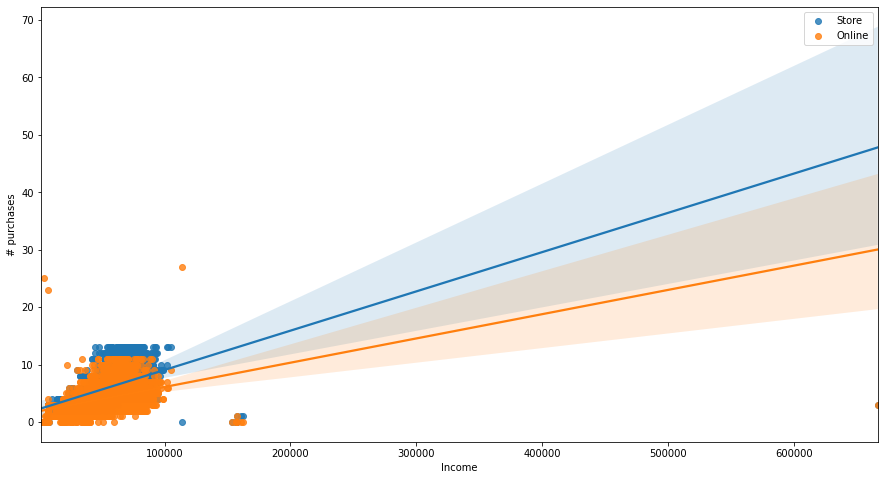

In [23]:
#Regplot for plotting a relation between two continous variables and adding two line to the plot
plt.figure(figsize = (15,8))
ax = sns.regplot(x='Income', y='NumStorePurchases', data=df, label='Store')
ax = sns.regplot(x='Income', y='NumWebPurchases', data=df, label='Online')
ax.set_ylabel("# purchases")
ax.set_xlabel("Income")
ax.legend()